In [15]:
import cv2 

img = cv2.imread('C:/Projects/ITM/INTELIGENCIA ARTIFICIAL/4_Proyecto_CNN/Img/Inundaciones/frame_2.jpg')
print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

40 40 3 3


# Cargar set de Imágenes

In [16]:
dirname = os.path.join(os.getcwd(),'C:/Projects/ITM/INTELIGENCIA ARTIFICIAL/4_Proyecto_CNN/Img')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:/Projects/ITM/INTELIGENCIA ARTIFICIAL/4_Proyecto_CNN/Img\
C:/Projects/ITM/INTELIGENCIA ARTIFICIAL/4_Proyecto_CNN/Img\Armas 1


<>:14: SyntaxWarning: invalid escape sequence '\.'
<>:14: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Antonio\AppData\Local\Temp\ipykernel_14880\2771985996.py:14: SyntaxWarning: invalid escape sequence '\.'
  if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):


C:/Projects/ITM/INTELIGENCIA ARTIFICIAL/4_Proyecto_CNN/Img\Asalto 1613
C:/Projects/ITM/INTELIGENCIA ARTIFICIAL/4_Proyecto_CNN/Img\Incendios 2840
C:/Projects/ITM/INTELIGENCIA ARTIFICIAL/4_Proyecto_CNN/Img\Inundaciones 3141
C:/Projects/ITM/INTELIGENCIA ARTIFICIAL/4_Proyecto_CNN/Img\Tornados 1224
Directorios leidos: 5
Imagenes en cada directorio [1614, 2840, 3141, 1224, 1894]
suma Total de imagenes en subdirs: 10713


# Creamos las etiquetas

In [17]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1
    
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy


# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)


Cantidad etiquetas creadas:  10713
0 Armas
1 Asalto
2 Incendios
3 Inundaciones
4 Tornados
Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

Training data shape :  (8570, 40, 40, 3) (8570,)
Testing data shape :  (2143, 40, 40, 3) (2143,)


Text(0.5, 1.0, 'Ground Truth : 2')

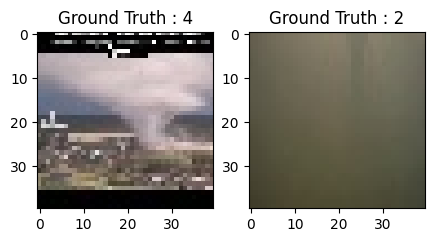

In [18]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

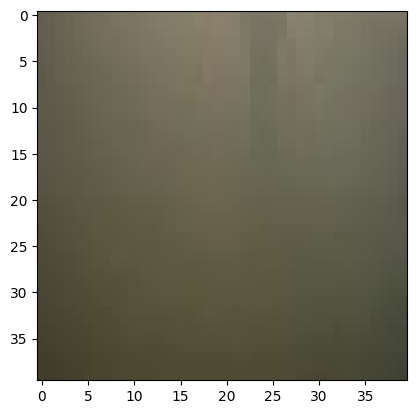

In [19]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [20]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 4
After conversion to one-hot: [0. 0. 0. 0. 1.]


# Creamos el Set de Entrenamiento y Validación

In [21]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(6856, 40, 40, 3) (1714, 40, 40, 3) (6856, 5) (1714, 5)


# Creamos el modelo de CNN

In [22]:
target_height = 40
target_width = 40

INIT_LR = 1e-3
epochs = 20
batch_size = 64

# Construcción del modelo
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same', input_shape=(target_height, target_width, 3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2), padding='same'))
sport_model.add(Dropout(0.5))
sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

sport_model.summary()

# Compilación del modelo
INIT_LR = 1e-3
optimizer = tf.keras.optimizers.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100)
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

c:\Projects\ITM\INTELIGENCIA ARTIFICIAL\entornoIA\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Projects\ITM\INTELIGENCIA ARTIFICIAL\entornoIA\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 40, 40, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 40, 40, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 20, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │       409,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 410,693 (1.57 MB)

 Trainable params: 410,693 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

c:\Projects\ITM\INTELIGENCIA ARTIFICIAL\entornoIA\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


# Entrenamos el modelo: Aprende a clasificar imágenes

In [23]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("/home/likcos/setDocto/sport.h5")

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.2917 - loss: 1.5874 - val_accuracy: 0.8314 - val_loss: 1.2111
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5408 - loss: 1.2725 - val_accuracy: 0.8565 - val_loss: 0.9153
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6711 - loss: 1.0290 - val_accuracy: 0.9008 - val_loss: 0.6896
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.7440 - loss: 0.8508 - val_accuracy: 0.9242 - val_loss: 0.5503
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.7914 - loss: 0.7237 - val_accuracy: 0.9277 - val_loss: 0.4522
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8142 - loss: 0.6602 - val_accuracy: 0.9288 - val_loss: 0.3874
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8421 - loss: 0.5826 - val_accuracy: 0.9481 - val_loss: 0.3326
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8620 - loss: 0.5198 - val_accu

# Evaluamos la red

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9658 - loss: 0.1328
Test loss: 0.12168999016284943
Test accuracy: 0.9715352058410645


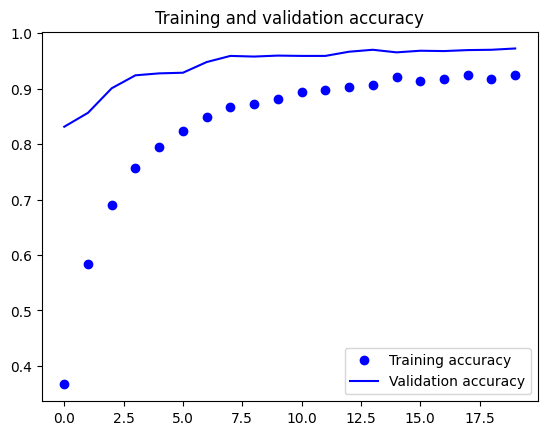

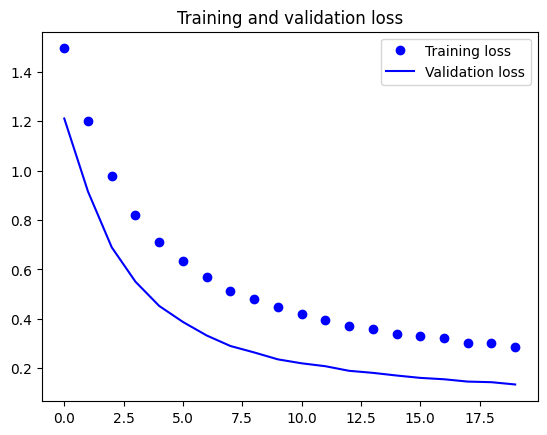

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


((2143,), (2143,))

In [24]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

sport_train.history

accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

predicted_classes2 = sport_model.predict(test_X)

predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

predicted_classes.shape, test_Y.shape

# Aprendamos de los errores: Qué mejorar

Found 2082 correct labels
Found 61 incorrect labels
              precision    recall  f1-score   support

     Class 0       0.96      0.97      0.96       325
     Class 1       1.00      0.97      0.98       590
     Class 2       0.96      0.97      0.96       585
     Class 3       0.91      0.93      0.92       229
     Class 4       1.00      1.00      1.00       414

    accuracy                           0.97      2143
   macro avg       0.96      0.97      0.97      2143
weighted avg       0.97      0.97      0.97      2143



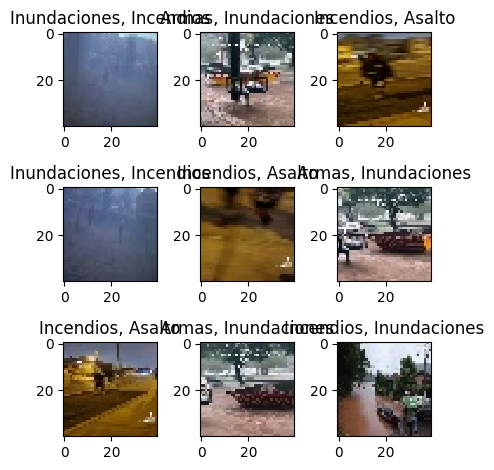

In [25]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(40,40,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()
    
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(40,40,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()
    
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))


In [26]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['C:/Projects/ITM/INTELIGENCIA ARTIFICIAL/4_Proyecto_CNN/View/v1.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (40, 40),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = sport_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], deportes[img_tagged.tolist().index(max(img_tagged))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
C:/Projects/ITM/INTELIGENCIA ARTIFICIAL/4_Proyecto_CNN/View/v1.jpg Incendios
